<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_04_heart_disease_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##heart_disease (심장병) 예측해보기

### 데이터 파악하기

In [ ]:
#모듈 가져오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#데이터 업로드

column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg',
               'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl', 'HeartDisease']  #데이터에 컬럼값이 없어서 만들어주기

raw_data = pd.read_excel('heart-disease.xlsx', header=None, names=column_name)

print(raw_data.head())

   age  sex  cp  treshbps chol  fbs  ...  exang  oldpeak  slope  ca  hsl HeartDisease
0   63    1   1       145  233    1  ...      0      2.3      3   0    6            0
1   67    1   4       160  286    0  ...      1      1.5      2   3    3            1
2   67    1   4       120    ?    0  ...      1      2.6      2   2    7            1
3   37    1   3       130  250    0  ...      0      3.5      3   0    3            0
4   41    0   2       130  204    0  ...      0      1.4      1   0    3            0

[5 rows x 14 columns]


In [ ]:
print(raw_data.tail())

     age  sex  cp  treshbps chol  ...  oldpeak  slope  ca  hsl  HeartDisease
298   45    1   1       110  264  ...      1.2      2   0    7             1
299   68    1   4       144  193  ...      3.4      2   2    7             1
300   57    1   4       130  131  ...      1.2      2   1    7             1
301   57    0   2       130  236  ...      0.0      2   1    3             1
302   38    1   3       138  175  ...      0.0      1   ?    3             0

[5 rows x 14 columns]


In [ ]:
print(raw_data.describe())

              age         sex          cp  ...     oldpeak       slope  HeartDisease
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000    303.000000
mean    54.438944    0.679868    3.158416  ...    1.039604    1.600660      0.458746
std      9.038662    0.467299    0.960126  ...    1.161075    0.616226      0.499120
min     29.000000    0.000000    1.000000  ...    0.000000    1.000000      0.000000
25%     48.000000    0.000000    3.000000  ...    0.000000    1.000000      0.000000
50%     56.000000    1.000000    3.000000  ...    0.800000    2.000000      0.000000
75%     61.000000    1.000000    4.000000  ...    1.600000    2.000000      1.000000
max     77.000000    1.000000    4.000000  ...    6.200000    3.000000      1.000000

[8 rows x 11 columns]


In [ ]:
print(raw_data.info())  

#chol, ca, hsl 의 타입에서 object는 '?' 같은 결측치가 들어가서 나온 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB
None


In [ ]:
#결측치가 들어간 row 삭제하기

clean_data = raw_data.replace('?', np.nan)  #replace는 앞 변수를 찾아 뒤 변수로 바꿔주는 것, 여기선 nan으로 바쭤주는 것이다
clean_data = clean_data.dropna()  #결측치 row 삭제하기

print(clean_data.info())

#info 결과 296개로 row가 바뀜, 결측치 자료가 7개, 만약 결측치 자료가 많다면 결측치가 해당된 컬럼을 버리는 것이 낫다

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB
None


In [ ]:
#타겟 추출하기 (타겟 : heart_disease)

keep = column_name.pop()  #pop은 리스트 자료형에서 맨 마지막 값을 리턴해주고, 리스트내에서 지워준다
print(keep)  #타겟

print(column_name)  #피쳐

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl']


In [ ]:
#데이터프레임 만들기

training_data = pd.DataFrame(clean_data.iloc[:, 0:13],  #iloc[:, 0:13] 앞인덱스는 row인덱싱, 뒤 인덱스는 col인덱싱(heart_disaese는 빼기 위해서 13까지함)
                            columns= column_name)  
target = pd.DataFrame(clean_data.iloc[:, 13], columns=[keep])  #keep은 문자열이라서 컬럼으로 들어가려면 리스트형으로 만들어야한다

print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  ...  thalach  exang  oldpeak  slope   ca  hsl
0   63    1   1       145  233.0    1  ...      150      0      2.3      3  0.0  6.0
1   67    1   4       160  286.0    0  ...      108      1      1.5      2  3.0  3.0
3   37    1   3       130  250.0    0  ...      187      0      3.5      3  0.0  3.0
4   41    0   2       130  204.0    0  ...      172      0      1.4      1  0.0  3.0
5   56    1   2       120  236.0    0  ...      178      0      0.8      1  0.0  3.0

[5 rows x 13 columns]
   HeartDisease
0             0
1             1
3             0
4             0
5             0


In [ ]:
#심장병이 있는 인원의 합

print(target['HeartDisease'].sum())

136


In [ ]:
#심장병이 있는 인원의 평균

print(target['HeartDisease'].mean())

0.4594594594594595


In [ ]:
#각 컬럼의 값이 다 다르기때문에
#스케일링 작업하기( StandardScaler(표준정규분포) =평균이 0, 표준편차가 1인 값으로 만들기)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)  #스케일링 할 데이터를 넣고 학습,변환시키기
scaled_data = pd.DataFrame(scaled_data, columns=column_name)  #스케일링을 작업하면서 데이터프레임이 풀려서 다시 데이터프레임으로 만들어준다
print(scaled_data.head())

        age       sex        cp  ...     slope        ca       hsl
0  0.942285  0.692820 -2.236793  ...  2.264087 -0.718421  0.660262
1  1.385714  0.692820  0.876486  ...  0.645320  2.487397 -0.890830
2 -1.939999  0.692820 -0.161274  ...  2.264087 -0.718421 -0.890830
3 -1.496571 -1.443376 -1.199033  ... -0.973448 -0.718421 -0.890830
4  0.166286  0.692820 -1.199033  ... -0.973448 -0.718421 -0.890830

[5 rows x 13 columns]


In [ ]:
print(scaled_data.describe().T)  #.T를 하면 열과 컬럼이 90도를 움직여서 보기 편하다

          count          mean       std  ...       50%       75%       max
age       296.0  4.500904e-18  1.001693  ...  0.166286  0.720571  2.494285
sex       296.0  2.850573e-17  1.001693  ...  0.692820  0.692820  0.692820
cp        296.0  1.200241e-16  1.001693  ... -0.161274  0.876486  0.876486
treshbps  296.0  6.067781e-16  1.001693  ... -0.097641  0.465747  3.846075
chol      296.0  1.997276e-17  1.001693  ... -0.084871  0.554717  6.089796
fbs       296.0  7.501507e-19  1.001693  ... -0.412263 -0.412263  2.425638
restecg   296.0  2.182939e-16  1.001693  ... -0.489853  1.020526  1.020526
thalach   296.0  6.458797e-16  1.001693  ...  0.145397  0.712830  2.284183
exang     296.0  5.926190e-17  1.001693  ... -0.692820  1.443376  1.443376
oldpeak   296.0 -7.951597e-17  1.001693  ... -0.215316  0.472766  4.429243
slope     296.0  1.155232e-16  1.001693  ...  0.645320  0.645320  2.264087
ca        296.0  6.526311e-17  1.001693  ... -0.718421  0.350185  2.487397
hsl       296.0 -2.663035

In [ ]:
#train, test로 데이터 분류하기

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size=0.30   #전체 데이터 중 30%는 테스트 데이터
)
print('X_train shape :', X_train.shape)
print('Y_train shape :', Y_train.shape)
print("X_test shape :", X_test.shape)
print("Y_test shape :", Y_test.shape)

#결과 14컬럼과 296개 열 중에서 train은 207row, test는 89row

X_train shape : (207, 13)
Y_train shape : (207, 1)
X_test shape : (89, 13)
Y_test shape : (89, 1)


In [ ]:
#학습을 위한 모델 만들기

model = Sequential()

model.add(Dense(512, input_dim=13, activation= 'relu'))  #Dense개수는 마음대로 써도 되지만, 일반적으로 2의 거듭제곱을 쓰는 게 일반적이다(효율적), input_dim은 첫 레이어만 넣어준다

 #Dropout= 파라미터 중 랜덤하게 뽑힌 25%값을 학습시키지 않는다는 것(그 다음 에포크에서는 새로운 25%가 학습되지 않음) = 과적합이 일어나는 것을 방지하기 위해서
model.add(Dropout(0.25))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))  #마지막 레이어에서 Dense개수는 무조건 1개, activation도 sigmoid가 일반적

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               7168      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

모델을 그림으로 나타내기

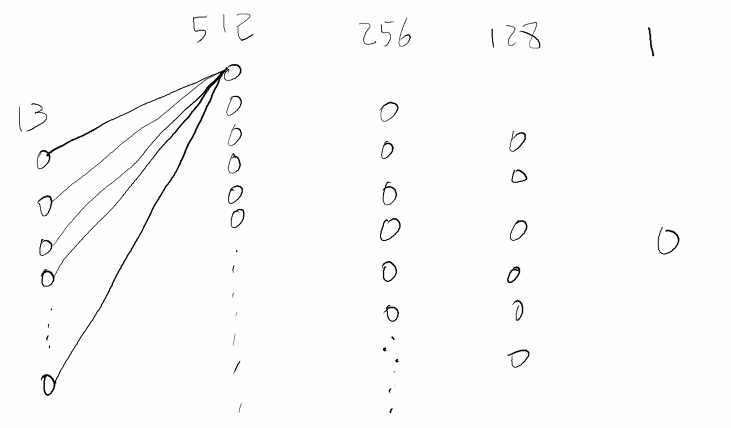

파라미터 개수 구하는 방법  

첫 번째 레이어 = 13 x 512 + 512 = 14 x 512 = 7168  
두 번째 레이어 = 512 x 256 + 256 = 513 x 256 = 131,328  
세 번째 레이어 = 256 x 128 + 128 = 257 x 128= 32,896  
마지막 레이어 = 128 x 1 + 1 = 129 x 1 = 129

In [ ]:
#모델 컴파일
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['binary_accuracy'])

#모델 학습
#batch_size=한 epoch중에 데이터를 50개씩 나눠서 학습을 한다는 것(사이즈를 작게 할 수록 조금 더 빠르게 학습이 된다 -미분을 배치사이즈마다 새로해서)
#validation_split=train 데이터 중 다시 학습데이터르 80& 테스트 20%를 구분시킨 뒤 에포크를 돌린 후 검증하고, 그 다음 epoch에선 다시 20%를 뽑아서 검증 = 과적합 검증을 위해 존재
fit_hist = model.fit(X_train, Y_train, batch_size= 50, epochs= 50, validation_split= 0.2) 

#기존 모델 결과 과적합이 일어난다

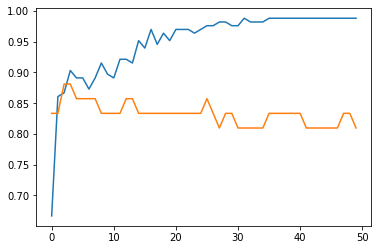

In [ ]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)  #evaluate= 미분을 하는 backward역할, verbose= 학습에 대한 진행사항이 나오는지 안나오는지, 0은 안나오고, 1은 나오고, 2는 프로그램바가 안보이고 결과만 나온다
print('Keras DNN model loss : ', score[0])
print('Keras DNN model accuracy : ', score[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.1817 - binary_accuracy: 0.8090
Keras DNN model loss :  0.18165965378284454
Keras DNN model accuracy :  0.8089887499809265


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)  #테스트 예측
pred = (pred > 0.5)  #비교해서 크면 1, 작으면 0

print(confusion_matrix(Y_test, pred)) #RP, FN, FP, TN을 알아보는 것

print(f1_score(Y_test, pred, average='micro'))  #위의 accuracy와 결과가 동일 하다는 것은, 모델 정확도를 돌릴 때 f1_score를 사용하는 것

[[35  9]
 [ 8 37]]
0.8089887640449437


결과  
[[35  9]   
 [ 8 37]]  
 이렇게 나왔는데 아래 그림과 같은 것, type1이 작아야 하는 게 포인트

 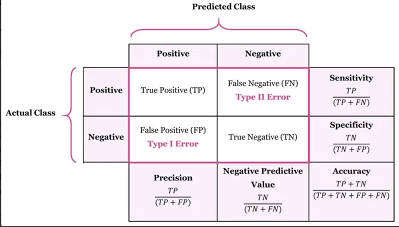



In [ ]:
#학습 후 모델이 어떻게 예측하는 지 알아보기

my_sample = np.random.randint(89)  #randint= 0~ 88사이 정수에서 랜덤 숫자를 하나 출력해준다 (89인 이유는 test데이터가 89개라서 하나를 인덱싱하기 위해서)
sample_data = np.array(X_test.iloc[my_sample]) #랜덤 숫자 하나를 가져오기
sample_data = sample_data.reshape(-1, 13)

print(model.predict(sample_data))   #예측값
print(Y_test.iloc[my_sample])  #정답값


[[0.9999999]]
HeartDisease    1
Name: 155, dtype: int64


머신러닝 순서

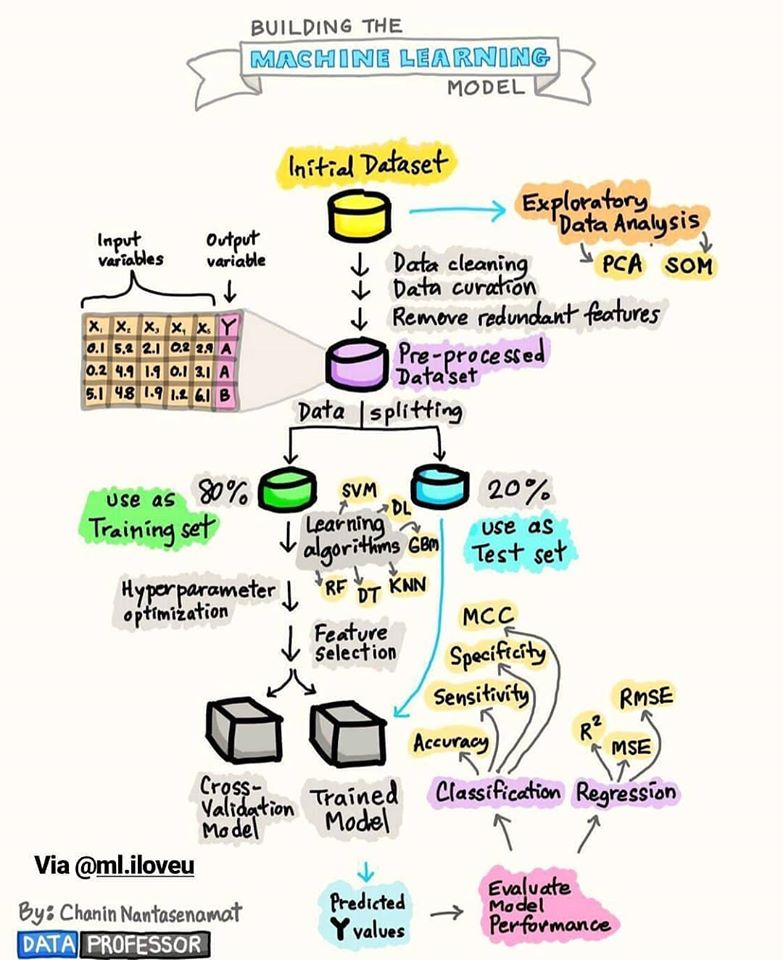